## Imports

In [1]:
import mltool
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

spotify_data = pd.read_csv("US.csv")

## Gathering Info about the Data

In [14]:
spotify_data.head(50)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_cat
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,NaN
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,NaN
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,NaN
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,NaN
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,...,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,NaN
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,...,-12.833,1,0.1240,0.965,0.000000,0.1550,0.7270,85.754,5,NaN
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,...,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,NaN
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,...,-16.222,0,0.0399,0.620,0.006450,0.1070,0.5440,139.952,4,NaN
9,0JV4iqw2lSKJaHBQZ0e5zK,Martín Fierro - Remasterizado,0,181173,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-29,0.548,0.0391,...,-23.228,1,0.1530,0.996,0.933000,0.1480,0.6120,75.595,3,NaN


In [3]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93135 entries, 0 to 93134
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                93135 non-null  object 
 1   name              93135 non-null  object 
 2   popularity        93135 non-null  int64  
 3   duration_ms       93135 non-null  int64  
 4   explicit          93135 non-null  int64  
 5   artists           93135 non-null  object 
 6   id_artists        93135 non-null  object 
 7   release_date      93135 non-null  object 
 8   danceability      93135 non-null  float64
 9   energy            93135 non-null  float64
 10  key               93135 non-null  int64  
 11  loudness          93135 non-null  float64
 12  mode              93135 non-null  int64  
 13  speechiness       93135 non-null  float64
 14  acousticness      93135 non-null  float64
 15  instrumentalness  93135 non-null  float64
 16  liveness          93135 non-null  float6

In [15]:
spotify_data["popularity"].value_counts()

0      19787
1       2293
40      1531
44      1510
39      1506
       ...  
96         2
95         1
100        1
98         1
99         1
Name: popularity, Length: 101, dtype: int64

In [5]:
spotify_data.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,93135.000000,9.313500e+04,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000,93135.000000
mean,29.587298,2.286306e+05,0.055983,0.541892,0.475952,5.197155,-11.740080,0.704687,0.106907,0.519607,0.192075,0.207581,0.537801,116.805784,3.853224
std,24.344976,1.409999e+05,0.229891,0.172534,0.271231,3.505184,5.632833,0.456186,0.184744,0.382106,0.331265,0.173911,0.261080,30.255816,0.511633
min,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.662945e+05,0.000000,0.423000,0.245000,2.000000,-14.890000,0.000000,0.035300,0.101000,0.000000,0.099700,0.329000,93.867500,4.000000
50%,32.000000,2.022000e+05,0.000000,0.553000,0.452000,5.000000,-10.869000,1.000000,0.045800,0.565000,0.000462,0.139000,0.553000,115.491000,4.000000
75%,49.000000,2.597265e+05,0.000000,0.671000,0.702000,8.000000,-7.507000,1.000000,0.077300,0.915000,0.220000,0.265000,0.755000,134.840500,4.000000
max,100.000000,4.800118e+06,1.000000,0.988000,1.000000,11.000000,3.855000,1.000000,0.970000,0.996000,1.000000,0.999000,1.000000,243.372000,5.000000


housing_data.hist(bins=50, figsize=(20,15))
plt.show()

## Train Test Split

In [24]:
spotify_data["popularity_cat"] = pd.cut(spotify_data["popularity"],
                        bins=[-1, 9.0, 18.0, 27.0, 36.0, 45.0, 54.0, 63.0, np.inf],
                        labels=[1, 2, 3, 4, 5, 6, 7, 8])

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(spotify_data, spotify_data["popularity_cat"]):
    strat_train_set = spotify_data.loc[train_index]
    strat_test_set = spotify_data.loc[test_index]
    
for set_ in (strat_train_set, strat_test_set):
    set_.drop("popularity_cat", axis=1, inplace=True)

## Gaining Insights

In [25]:
insights_copy = strat_train_set.copy()

corr_matrix = insights_copy.corr()
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
energy              0.400592
loudness            0.394641
explicit            0.261718
danceability        0.163402
time_signature      0.118718
tempo               0.111462
valence             0.064764
duration_ms         0.061259
key                 0.010999
mode               -0.004363
liveness           -0.103623
speechiness        -0.213104
instrumentalness   -0.335340
acousticness       -0.506573
Name: popularity, dtype: float64

<AxesSubplot:xlabel='popularity', ylabel='energy'>

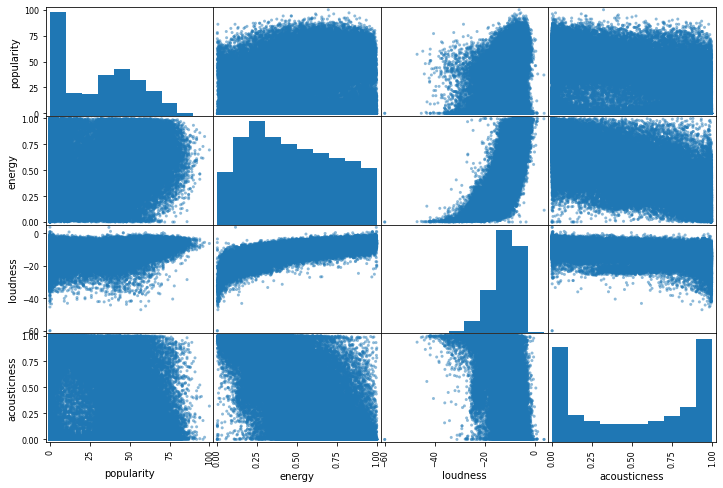

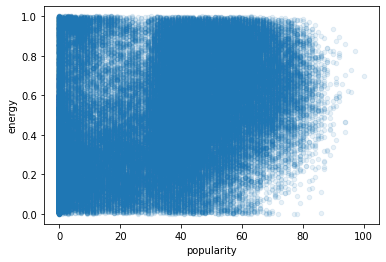

In [27]:
attributes = ["popularity", "energy", "loudness", "acousticness"]
scatter_matrix(insights_copy[attributes], figsize=(12, 8))
insights_copy.plot(kind="scatter", x="popularity", y="energy", alpha=0.1)

## Creating More Features

In [28]:
insights_copy["softness"] = (insights_copy["instrumentalness"] + insights_copy["acousticness"]) / 2
insights_copy["heavyness"] = (insights_copy["energy"] + insights_copy["loudness"]) / 2

corr_matrix = insights_copy.corr()
corr_matrix["popularity"].sort_values(ascending=False)

popularity          1.000000
energy              0.400592
heavyness           0.398779
loudness            0.394641
explicit            0.261718
danceability        0.163402
time_signature      0.118718
tempo               0.111462
valence             0.064764
duration_ms         0.061259
key                 0.010999
mode               -0.004363
liveness           -0.103623
speechiness        -0.213104
instrumentalness   -0.335340
acousticness       -0.506573
softness           -0.536479
Name: popularity, dtype: float64

In [29]:
importlib.reload(ml_toolkit)
spotify_training = strat_train_set.drop("popularity", axis=1)
housing_labels = strat_train_set["popularity"].copy()
spotify_prepared = ml_toolkit.run_full_pipeline(spotify_training)

NameError: name 'ml_toolkit' is not defined

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [13]:
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

69050.98178244587

In [14]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

print("Scores:", lin_rmse_scores)
print("Mean:", lin_rmse_scores.mean())
print("Standard deviation:", lin_rmse_scores.std())

Scores: [67450.42057782 67329.50264436 68361.84864912 74639.88837894
 68314.56738182 71628.61410355 65361.14176205 68571.62738037
 72476.18028894 68098.06828865]
Mean: 69223.18594556303
Standard deviation: 2657.268311277696


## Decision Tree Regressor

In [15]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [16]:
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

print("Scores:", tree_rmse_scores)
print("Mean:", tree_rmse_scores.mean())
print("Standard deviation:", tree_rmse_scores.std())

Scores: [67721.60737073 65363.87443129 71350.90839427 69197.62244695
 68218.77037811 75857.83046628 66565.45696964 70036.40067004
 68580.13821978 69488.36550157]
Mean: 69238.09748486613
Standard deviation: 2736.9816764496027


## Random Forest Regressor

In [17]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor()
random_forest_reg.fit(housing_prepared, housing_labels)

scores = cross_val_score(random_forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

print("Scores:", forest_rmse_scores)
print("Mean:", forest_rmse_scores.mean())
print("Standard deviation:", forest_rmse_scores.std())

Scores: [47788.98936185 46348.07689131 49432.96629842 50002.1552784
 49514.30238838 53358.06170171 48922.29913127 50102.96561496
 51516.29696412 49388.33994889]
Mean: 49637.445357930446
Standard deviation: 1805.2697792061094


## Fine Tuning

In [25]:
param_grid = [
    {'n_estimators': [3, 10, 30, 50], 'max_features': [4, 6, 8, 10]},
    {'bootstrap': [False], 'n_estimators': [3, 10, 30], 'max_features': [2, 3, 4, 6]},
]

random_forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(random_forest_reg, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [4, 6, 8, 10],
                          'n_estimators': [3, 10, 30, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4, 6],
                          'n_estimators': [3, 10, 30]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [29]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=50)

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

61480.95253357381 {'max_features': 4, 'n_estimators': 3}
52946.3174159539 {'max_features': 4, 'n_estimators': 10}
50990.18235386977 {'max_features': 4, 'n_estimators': 30}
50607.176810892255 {'max_features': 4, 'n_estimators': 50}
59006.581744189636 {'max_features': 6, 'n_estimators': 3}
52556.91019652068 {'max_features': 6, 'n_estimators': 10}
50327.752585013346 {'max_features': 6, 'n_estimators': 30}
50119.21896516563 {'max_features': 6, 'n_estimators': 50}
58583.29818082622 {'max_features': 8, 'n_estimators': 3}
52070.628299842494 {'max_features': 8, 'n_estimators': 10}
50136.44001805841 {'max_features': 8, 'n_estimators': 30}
49704.36352318516 {'max_features': 8, 'n_estimators': 50}
59010.88288622222 {'max_features': 10, 'n_estimators': 3}
52287.00719755679 {'max_features': 10, 'n_estimators': 10}
50661.40642103196 {'max_features': 10, 'n_estimators': 30}
49950.251770129675 {'max_features': 10, 'n_estimators': 50}
62600.36990041566 {'bootstrap': False, 'max_features': 2, 'n_estimat

In [34]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([1.15414752e-01, 1.04950980e-01, 4.90673202e-02, 3.12288468e-02,
       2.64791473e-02, 3.73532488e-02, 2.55393057e-02, 4.33632889e-01,
       1.36227862e-02, 1.52968910e-01, 7.84377260e-05, 3.66616289e-03,
       5.99721274e-03])

## Evaluate on Test Set

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()